# Сделать на урезанных данных

In [2]:
# !pip install transformers

In [3]:
import pandas as pd
import torch
import numpy as np
from transformers import BertTokenizer, BertModel
from torch import nn
from torch.optim import Adam
from tqdm import tqdm
import random #

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
import datasets
from datasets import Dataset

## Topics

In [5]:
df = pd.read_csv("/kaggle/input/datasets-2/datasets_2/topics_train_to_model.csv")[:100]
train_df_topics = pd.DataFrame({
     "label" : list(df['topic']),
     "text" : list(df['text'].astype(str))
})

df = pd.read_csv("/kaggle/input/datasets-2/datasets_2/topics_test_to_model.csv")[:50]
test_df_topics = pd.DataFrame({
     "label" : list(df['topic']),
     "text" : list(df['text'].astype(str))
})

df = pd.read_csv("/kaggle/input/datasets-2/datasets_2/topics_val_to_model.csv")[:50]
val_df_topics = pd.DataFrame({
     "label" : list(df['topic']),
     "text" : list(df['text'].astype(str))
})

In [6]:
train_df_topics.label.unique()

array(['Health&Medicine', 'Politics', 'Sports', 'Beauty', 'Travel',
       'Religion', 'Home&Design', 'Movies&Tv', 'Books&Literature',
       'Family&Relationships', 'Food', 'Education', ' Art&Hobbies', 'Job',
       'Videogames', 'Finance', ' Travel'], dtype=object)

In [7]:
labels_topic = {'Health&Medicine': 0, 'Politics': 1, 'Sports': 2, 'Beauty': 3, 'Travel': 4,
       'Religion': 5, 'Home&Design': 6, 'Movies&Tv': 7, 'Books&Literature': 8,
       'Family&Relationships': 9, 'Food': 10, 'Education': 11, ' Art&Hobbies': 12, 'Job': 13,
       'Videogames': 14, 'Finance': 15, ' Travel': 16, 'Animals&Pets': 17, ' Job': 18,
       'Clothes': 19, ' Animals&Pets': 20, 'Depression': 21, 'Music': 22, 'Art&Hobbies': 23
}

In [8]:
train_df_topics[pd.isnull(train_df_topics['label'])].index

Int64Index([], dtype='int64')

In [9]:
test_df_topics[pd.isnull(test_df_topics['label'])].index

Int64Index([], dtype='int64')

In [10]:
val_df_topics[pd.isnull(val_df_topics['label'])].index

Int64Index([], dtype='int64')

In [11]:
def topic_classification_task(item):
#     item = df.sample()
    return f'topic | {item["text"]}'#, item["label"]

In [12]:
train_df_topics['text'] = train_df_topics.apply(lambda x: topic_classification_task(x), axis = 1)
test_df_topics['text'] = test_df_topics.apply(lambda x: topic_classification_task(x), axis = 1)
val_df_topics['text'] = val_df_topics.apply(lambda x: topic_classification_task(x), axis = 1)

In [13]:
train_df_topics.iloc[0]['text']

'topic |  В этот паспорт войдет дополнительно к стоматологической карте по согласованию с врачом ряд дополнительных исследований. Я, например, в обязательном порядке попрошу провести изучение моей переносимости основных стоматологических обезболивающих препаратов и используемых материалов (например, металлов). Т.е. у меня будет определен хотя бы первичный аллергический статус. Потом я хочу сделать компьютерную томографию, что бы иметь трехмерное изображение моей ротовой полости. Мало ли куда жизнь занесет, и кто мне зубы лечить будет. А с таким трехмерным снимком все значительно проще. А вот на счет пародонтологический статуса вопрос остается открытым, пусть доктор решает, нужен мне он или нет. Так что, за несколько дней мне сделают в бумажном и электронном виде полнейшее обследование зубов и десен. На мой взгляд, это очень полезный документ получится.'

In [14]:
# def topic_classification_task_VAL():
#     item = val_df_topics.sample()
#     return f'topic | {item["text"].values[0]}', item["label"].values[0]

# topic_classification_task_VAL()

## dialog_act_classification (Switchboard)

In [15]:
df = pd.read_csv("/kaggle/input/datasets-2/datasets_2/swda_train_to_model_new_label.csv")[:100]
train_df_swda = pd.DataFrame({
     "label" : list(df['label']),
     "text" : list(df['new'])
})

df = pd.read_csv("/kaggle/input/datasets-2/datasets_2/swda_test_to_model_new_label.csv")[:50]
test_df_swda = pd.DataFrame({
     "label" : list(df['label']),
     "text" : list(df['new'])
})

df = pd.read_csv("/kaggle/input/datasets-2/datasets_2/swda_val_to_model_new_label.csv")[:50]
val_df_swda = pd.DataFrame({
     "label" : list(df['label']),
     "text" : list(df['new'])
})

In [16]:
train_df_swda.label.unique()

array(['Other', 'Wh-Question', 'Declarative Yes-No-Question',
       'Yes-No-Question', 'Statement-non-opinion', 'Action-directive',
       'Hedge', 'Agree/Accept', 'Acknowledge (Backchannel)',
       'Statement-opinion', 'Response Acknowledgement', 'No Answers',
       'Affirmative Non-yes Answers', 'Backchannel in Question Form',
       'Yes Answers', 'Uninterpretable', 'Appreciation',
       'Summarize/Reformulate', 'Repeat-phrase', 'Rhetorical-Question'],
      dtype=object)

In [17]:
labels_swda = {
"Statement-non-opinion": 0,
"Acknowledge (Backchannel)": 1,
"Statement-opinion": 2,
"Uninterpretable": 3,
"Agree/Accept": 4,
"Appreciation": 5,
"Yes-No-Question": 6,
"Yes Answers": 7,
"Conventional-closing": 8,
"Wh-Question": 9,
"No Answers": 10,
"Response Acknowledgement": 11,
"Hedge": 12,
"Declarative Yes-No-Question": 13,
"Backchannel in Question Form": 14,
"Quotation": 15,
"Summarize/Reformulate": 16,
"Other": 17,
"Affirmative Non-yes Answers": 18,
"Action-directive": 19,
"Collaborative Completion": 20,
"Repeat-phrase": 21,
"Open-Question": 22,
"Rhetorical-Question": 23,
"Hold Before Answer/Agreement": 24,
"Reject": 25,
"Negative Non-no Answers": 26,
"Signal-non-understanding": 27,
"Other Answers": 28,
"Conventional-opening": 29,
"Or-Clause": 30,
"Dispreferred Answers": 31,
"3rd-party-talk": 32,
"Offers, Options Commits": 33,
"Maybe/Accept-part": 34,
"Downplayer": 35,
"Self-talk": 36,
"Tag-Question": 37,
"Declarative Wh-Question": 38,
"Apology": 39,
"Thanking": 40
}

In [18]:
# Не создавался MY_Dataset из-за keyError nan

train_df_swda[pd.isnull(train_df_swda['label'])].index

Int64Index([], dtype='int64')

In [19]:
test_df_swda[pd.isnull(test_df_swda['label'])].index

Int64Index([], dtype='int64')

In [20]:
val_df_swda[pd.isnull(val_df_swda['label'])].index

Int64Index([], dtype='int64')

In [21]:
len(train_df_swda)

100

In [22]:
train_df_swda = train_df_swda.drop (index = train_df_swda[pd.isnull(train_df_swda['label'])].index )

In [23]:
train_df_swda[pd.isnull(train_df_swda['label'])]

,label,text


In [24]:
len(train_df_swda)

100

In [25]:
def swda_classification_task(item):
#     item = train_df_swda.sample()
    return f'dialog_act_swda | {item["text"]}'#, item["label"].values[0]

In [26]:
train_df_swda['text'] = train_df_swda.apply(lambda x: swda_classification_task(x), axis = 1)
test_df_swda['text'] = test_df_swda.apply(lambda x: swda_classification_task(x), axis = 1)
val_df_swda['text'] = val_df_swda.apply(lambda x: swda_classification_task(x), axis = 1)

In [27]:
train_df_swda.iloc[0]['text']

'dialog_act_swda | ПУСТО\nХорошо.'

In [28]:
# def swda_classification_task_VAL():
#     item = val_df_swda.sample()
#     return f'dialog_act_swda | {item["text"].values[0]}', item["label"].values[0]

# swda_classification_task_VAL()

## dialog_act_classification (MIDAS)

In [29]:
df = pd.read_csv("/kaggle/input/datasets-2/datasets_2/MIDAS_train_to_model.csv")[:100]
train_df_midas = pd.DataFrame({
     "label" : list(df['joint_labels']),
     "text" : list(df['text'])
})

df = pd.read_csv("/kaggle/input/datasets-2/datasets_2/MIDAS_test_to_model.csv")[:50]
test_df_midas = pd.DataFrame({
     "label" : list(df['label']),
     "text" : list(df['text'])
})

df = pd.read_csv("/kaggle/input/datasets-2/datasets_2/MIDAS_val_to_model.csv")[:50]
val_df_midas = pd.DataFrame({
     "label" : list(df['label']),
     "text" : list(df['text'])
})

In [30]:
train_df_midas.label.unique()

array(['open_question_factual', 'pos_answer;command', 'pos_answer',
       'opinion', 'statement', 'back-channeling', 'yes_no_question',
       'command;statement', 'appreciation', 'other_answers', 'thanking',
       'open_question_opinion', 'hold', 'closing', 'comment',
       'neg_answer', 'command', 'pos_answer;statement',
       'neg_answer;command', 'complaint', 'abandon',
       'dev_command;yes_no_question', 'command;opinion'], dtype=object)

In [31]:
labels_midas = {'open_question_factual': 0, 'pos_answer;command': 1, 'pos_answer': 2,
       'opinion': 3, 'statement': 4, 'back-channeling': 5, 'yes_no_question': 6,
       'command;statement': 7, 'appreciation': 8, 'other_answers': 9, 'thanking': 10,
       'open_question_opinion': 11, 'hold': 12, 'closing': 13, 'comment': 14,
       'neg_answer': 15, 'command': 16, 'pos_answer;statement': 17,
       'neg_answer;command': 18, 'complaint': 19, 'abandon': 20,
       'dev_command;yes_no_question': 21, 'command;opinion': 22, 'dev_command': 23,
       'apology': 24, 'neg_answer;statement': 25, 'nonsense': 26,
       'pos_answer;opinion': 27, 'opinion;yes_no_question': 28,
       'command;yes_no_question': 29, 'other': 30, 'neg_answer;opinion': 31,
       'opening': 32, 'command;open_question_factual': 33,
       'command;open_question_opinion': 34, 'pos_answer;comment': 35,
       'command;complaint': 36, 'opinion;open_question_opinion': 37,
       'respond_to_apology': 38, 'other_answers;opinion': 39,
       'neg_answer;comment': 40
}

In [32]:
train_df_midas[pd.isnull(train_df_midas['label'])].index

Int64Index([], dtype='int64')

In [33]:
test_df_midas[pd.isnull(test_df_midas['label'])].index

Int64Index([], dtype='int64')

In [34]:
val_df_midas[pd.isnull(val_df_midas['label'])].index

Int64Index([], dtype='int64')

In [35]:
def midas_classification_task(item):
#     item = train_df_midas.sample()
    return f'dialog_act_midas | {item["text"]}'#, item["label"].values[0]

In [36]:
train_df_midas['text'] = train_df_midas.apply(lambda x: midas_classification_task(x), axis = 1)
test_df_midas['text'] = test_df_midas.apply(lambda x: midas_classification_task(x), axis = 1)
val_df_midas['text'] = val_df_midas.apply(lambda x: midas_classification_task(x), axis = 1)

In [37]:
train_df_midas.iloc[0]['text']

'dialog_act_midas | как насчет еще одной короткой части футбольных новостей : ПУСТО > как вы можете выбрать нас прямо сейчас'

In [38]:
# def midas_classification_task_VAL():
#     item = val_df_midas.sample()
#     return f'dialog_act_midas | {item["text"].values[0]}', item["label"].values[0]

# midas_classification_task_VAL()

## Emotion

In [39]:
df = pd.read_csv("/kaggle/input/datasets-2/datasets_2/emotion_train_to_model.csv")[:100]
train_df_emotion = pd.DataFrame({
     "label" : list(df['label']),
     "text" : list(df['text'])
})

df = pd.read_csv("/kaggle/input/datasets-2/datasets_2/emotion_test_to_model.csv")[:50]
test_df_emotion = pd.DataFrame({
     "label" : list(df['label']),
     "text" : list(df['text'])
})

df = pd.read_csv("/kaggle/input/datasets-2/datasets_2/emotion_val_to_model.csv")[:50]
val_df_emotion = pd.DataFrame({
     "label" : list(df['label']),
     "text" : list(df['text'])
})

In [40]:
train_df_emotion.label.unique()

array(['sadness', 'joy', 'fear', 'anger', 'surprise'], dtype=object)

In [41]:
labels_emotion = {'sadness': 0, 'joy': 1, 'fear': 2, 'anger': 3, 'surprise': 4
}

In [42]:
train_df_emotion[pd.isnull(train_df_emotion['label'])].index

Int64Index([], dtype='int64')

In [43]:
test_df_emotion[pd.isnull(test_df_emotion['label'])].index

Int64Index([], dtype='int64')

In [44]:
val_df_emotion[pd.isnull(val_df_emotion['label'])].index

Int64Index([], dtype='int64')

In [45]:
def emotion_classification_task(item):
#     item = train_df_emotion.sample()
    return f'emotion | {item["text"]}'#, item["label"].values[0]

In [46]:
train_df_emotion['text'] = train_df_emotion.apply(lambda x: emotion_classification_task(x), axis = 1)
test_df_emotion['text'] = test_df_emotion.apply(lambda x: emotion_classification_task(x), axis = 1)
val_df_emotion['text'] = val_df_emotion.apply(lambda x: emotion_classification_task(x), axis = 1)

In [47]:
train_df_emotion.iloc[0]['text']

'emotion | Пессимизм в том , что систему не сломить , что единственный выход - это побег , эмиграция .'

In [48]:
# def emotion_classification_task_VAL():
#     item = val_df_emotion.sample()
#     return f'emotion | {item["text"].values[0]}', item["label"].values[0]

# emotion_classification_task_VAL()

## Sentiment

In [49]:
df = pd.read_csv("/kaggle/input/datasets-2/datasets_2/sentiment_train_to_model.csv")[:100]
train_df_sentiment = pd.DataFrame({
     "label" : list(df['label']),
     "text" : list(df['text'])
})

df = pd.read_csv("/kaggle/input/datasets-2/datasets_2/sentiment_test_to_model.csv")[:50]
test_df_sentiment = pd.DataFrame({
     "label" : list(df['label']),
     "text" : list(df['text'])
})

df = pd.read_csv("/kaggle/input/datasets-2/datasets_2/sentiment_val_to_model.csv")[:50]
val_df_sentiment = pd.DataFrame({
     "label" : list(df['label']),
     "text" : list(df['text'])
})

In [50]:
train_df_sentiment.label.unique()

array(['neutral', 'positive', 'negative', 'skip', 'speech'], dtype=object)

In [51]:
labels_sentiment = {'neutral': 0, 'positive': 1, 'negative': 2, 'skip': 3, 'speech': 4
}

In [52]:
train_df_sentiment[pd.isnull(train_df_sentiment['label'])].index

Int64Index([], dtype='int64')

In [53]:
test_df_sentiment[pd.isnull(test_df_sentiment['label'])].index

Int64Index([], dtype='int64')

In [54]:
val_df_sentiment[pd.isnull(val_df_sentiment['label'])].index

Int64Index([], dtype='int64')

In [55]:
def sentiment_classification_task(item):
#     item = train_df_sentiment.sample()
    return f'sentiment | {item["text"]}'#, item["label"].values[0]

In [56]:
train_df_sentiment['text'] = train_df_sentiment.apply(lambda x: sentiment_classification_task(x), axis = 1)
test_df_sentiment['text'] = test_df_sentiment.apply(lambda x: sentiment_classification_task(x), axis = 1)
val_df_sentiment['text'] = val_df_sentiment.apply(lambda x: sentiment_classification_task(x), axis = 1)

In [57]:
train_df_sentiment.iloc[0]['text']

'sentiment | Добро пожаловать в Бабушкин лофт. \nP.S. Жить сам - done✅'

In [58]:
# def sentiment_classification_task_VAL():
#     item = val_df_sentiment.sample()
#     return f'sentiment | {item["text"].values[0]}', item["label"].values[0]

# sentiment_classification_task_VAL()

## Toxic

In [59]:
df = pd.read_csv("/kaggle/input/datasets-2/datasets_2/toxic_train_to_model.csv")[:100]
train_df_toxic = pd.DataFrame({
     "label" : list(df['label']),
     "text" : list(df['text'])
})

df = pd.read_csv("/kaggle/input/datasets-2/datasets_2/toxic_test_to_model.csv")[:50]
test_df_toxic = pd.DataFrame({
     "label" : list(df['label']),
     "text" : list(df['text'])
})

df = pd.read_csv("/kaggle/input/datasets-2/datasets_2/toxic_val_to_model.csv")[:50]
val_df_toxic = pd.DataFrame({
     "label" : list(df['label']),
     "text" : list(df['text'])
})

In [60]:
train_df_toxic.label.unique()

array([0., 1.])

In [61]:
labels_toxic = {0.: 0, 1.: 1}

In [62]:
train_df_toxic[pd.isnull(train_df_toxic['label'])].index

Int64Index([], dtype='int64')

In [63]:
test_df_toxic[pd.isnull(test_df_toxic['label'])].index

Int64Index([], dtype='int64')

In [64]:
val_df_toxic[pd.isnull(val_df_toxic['label'])].index

Int64Index([], dtype='int64')

In [65]:
def toxic_classification_task(item):
#     item = train_df_toxic.sample()
    return f'toxic | {item["text"]}'#, item["label"].values[0]

In [66]:
train_df_toxic['text'] = train_df_toxic.apply(lambda x: toxic_classification_task(x), axis = 1)
test_df_toxic['text'] = test_df_toxic.apply(lambda x: toxic_classification_task(x), axis = 1)
val_df_toxic['text'] = val_df_toxic.apply(lambda x: toxic_classification_task(x), axis = 1)

In [67]:
train_df_toxic.iloc[0]['text']

'toxic | Я последнюю серию специально не смотрю, для меня этот сериал не закончился )\n'

In [68]:
# def toxic_classification_task_VAL():
#     item = val_df_toxic.sample()
#     return f'toxic | {item["text"].values[0]}', item["label"].values[0]

# toxic_classification_task_VAL()

## Factoid

In [69]:
df = pd.read_csv("/kaggle/input/datasets-2/datasets_2/Yahoo_train_to_model.csv")[:100]
train_df_factoid = pd.DataFrame({
     "label" : list(df['label']),
     "text" : list(df['text'])
})

df = pd.read_csv("/kaggle/input/datasets-2/datasets_2/Yahoo_test_to_model.csv")[:50]
test_df_factoid = pd.DataFrame({
     "label" : list(df['label']),
     "text" : list(df['text'])
})

df = pd.read_csv("/kaggle/input/datasets-2/datasets_2/Yahoo_val_to_model.csv")[:50]
val_df_factoid = pd.DataFrame({
     "label" : list(df['label']),
     "text" : list(df['text'])
})

In [70]:
train_df_factoid.label.unique()

array([1, 0])

In [71]:
labels_factoid = {1: 1, 0: 0}

In [72]:
train_df_factoid[pd.isnull(train_df_factoid['label'])].index

Int64Index([], dtype='int64')

In [73]:
test_df_factoid[pd.isnull(test_df_factoid['label'])].index

Int64Index([], dtype='int64')

In [74]:
val_df_factoid[pd.isnull(val_df_factoid['label'])].index

Int64Index([], dtype='int64')

In [75]:
def factoid_classification_task(item):
#     item = train_df_factoid.sample()
    return f'factoid | {item["text"]}'#, item["label"].values[0]

In [76]:
train_df_factoid['text'] = train_df_factoid.apply(lambda x: factoid_classification_task(x), axis = 1)
test_df_factoid['text'] = test_df_factoid.apply(lambda x: factoid_classification_task(x), axis = 1)
val_df_factoid['text'] = val_df_factoid.apply(lambda x: factoid_classification_task(x), axis = 1)

In [77]:
train_df_factoid.iloc[0]['text']

'factoid | Какова ваша позиция по поводу брачных абортов и смертной казни? & Брак ; - 1 мужчина + 1 женщина [ традиционный ] ; - 2 взрослых по обоюдному согласию [ однополый брак ] ; - 2 или более взрослых по обоюдному согласию [ полигамия ] ; ; Аборт ; - За жизнь ; - За выбор ; ; Смертная казнь ; - Хорошо ; - Плохо ; ; спорно, да...но мне просто любопытно =] спасибо, ххххх!'

In [78]:
# def factoid_classification_task_VAL():
#     item = val_df_factoid.sample()
#     return f'factoid | {item["text"].values[0]}', item["label"].values[0]

# factoid_classification_task_VAL()

In [79]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased', task_labels_map={"topics": 24, "swda": 41, "midas": 41,
                                                           "emotion": 5, "sentiment": 5,
                                                           "toxic": 2, "factoid": 2})

In [80]:
# https://towardsdatascience.com/text-classification-with-bert-in-pytorch-887965e5820f

class MY_Dataset(torch.utils.data.Dataset):

    def __init__(self, df, task):
        if task == 'topics':
            self.labels = [labels_topic[label] for label in df['label']]
        elif task == 'swda':
            self.labels = [labels_swda[label] for label in df['label']]
        elif task == 'midas':
            self.labels = [labels_midas[label] for label in df['label']]
        elif task == 'emotion':
            self.labels = [labels_emotion[label] for label in df['label']]
        elif task == 'sentiment':
            self.labels = [labels_sentiment[label] for label in df['label']]
        elif task == 'toxic':
            self.labels = [labels_toxic[label] for label in df['label']]
        elif task == 'factoid':
            self.labels = [labels_factoid[label] for label in df['label']]

#         self.labels = [labels[label] for label in df['category']]
        self.texts = [tokenizer(text, 
                               padding='max_length', max_length = 512, truncation=True,
                                return_tensors="pt") for text in df['text']]

    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]

    def __getitem__(self, idx):

        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y

In [81]:
# https://towardsdatascience.com/text-classification-with-bert-in-pytorch-887965e5820f
# https://medium.com/@shahrukhx01/multi-task-learning-with-transformers-part-1-multi-prediction-heads-b7001cf014bf

class BertClassifier(nn.Module):

    def __init__(self, dropout=0.5, **kwargs):

        super(BertClassifier, self).__init__()
        
        self.num_labels = kwargs.get("task_labels_map", {})

        self.bert = BertModel.from_pretrained('bert-base-cased')
        self.dropout = nn.Dropout(dropout)
        self.linear_topic = nn.Linear(768, 24)
        self.linear_swda = nn.Linear(768, 41)
        self.linear_midas = nn.Linear(768, 41)
        self.linear_emotion = nn.Linear(768, 5)
        self.linear_sentiment = nn.Linear(768, 5)
        self.linear_toxic = nn.Linear(768, 2)
        self.linear_factoid = nn.Linear(768, 2)
        self.relu = nn.ReLU()

    def forward(self, input_id, mask, task_name):

        _, pooled_output = self.bert(input_ids= input_id, attention_mask=mask, return_dict=False)
        dropout_output = self.dropout(pooled_output)
        linear_output = None
        if task_name == 'topic':
            linear_output = self.linear_topic(dropout_output)
        elif task_name == 'swda':
            linear_output = self.linear_swda(dropout_output)
        elif task_name == 'midas':
            linear_output = self.linear_midas(dropout_output)
        elif task_name == 'emotion':
            linear_output = self.linear_emotion(dropout_output)
        elif task_name == 'sentiment':
            linear_output = self.linear_sentiment(dropout_output)
        elif task_name == 'toxic':
            linear_output = self.linear_toxic(dropout_output)
        elif task_name == 'factoid':
            linear_output = self.linear_factoid(dropout_output)
        final_layer = self.relu(linear_output)

        return final_layer

In [82]:
# не хватает ресурсов запускать локально (ядро падает)

train_topics, val_topics = MY_Dataset(train_df_topics, 'topics'), MY_Dataset(val_df_topics, 'topics')
train_swda, val_swda = MY_Dataset(train_df_swda, 'swda'), MY_Dataset(val_df_swda, 'swda')
train_midas, val_midas = MY_Dataset(train_df_midas, 'midas'), MY_Dataset(val_df_midas, 'midas')
train_emotion, val_emotion = MY_Dataset(train_df_emotion, 'emotion'), MY_Dataset(val_df_emotion, 'emotion')
train_sentiment, val_sentiment = MY_Dataset(train_df_sentiment, 'sentiment'), MY_Dataset(val_df_sentiment, 'sentiment')
train_toxic, val_toxic = MY_Dataset(train_df_toxic, 'toxic'), MY_Dataset(val_df_toxic, 'toxic')
train_factoid, val_factoid = MY_Dataset(train_df_factoid, 'factoid'), MY_Dataset(val_df_factoid, 'factoid')

train_topics_dataloader = torch.utils.data.DataLoader(train_topics, batch_size=2, shuffle=True)
val_topics_dataloader = torch.utils.data.DataLoader(val_topics, batch_size=2)
train_swda_dataloader = torch.utils.data.DataLoader(train_swda, batch_size=2, shuffle=True)
val_swda_dataloader = torch.utils.data.DataLoader(val_swda, batch_size=2)
train_midas_dataloader = torch.utils.data.DataLoader(train_midas, batch_size=2, shuffle=True)
val_midas_dataloader = torch.utils.data.DataLoader(val_midas, batch_size=2)
train_emotion_dataloader = torch.utils.data.DataLoader(train_emotion, batch_size=2, shuffle=True)
val_emotion_dataloader = torch.utils.data.DataLoader(val_emotion, batch_size=2)
train_sentiment_dataloader = torch.utils.data.DataLoader(train_sentiment, batch_size=2, shuffle=True)
val_sentiment_dataloader = torch.utils.data.DataLoader(val_sentiment, batch_size=2)
train_toxic_dataloader = torch.utils.data.DataLoader(train_toxic, batch_size=2, shuffle=True)
val_toxic_dataloader = torch.utils.data.DataLoader(val_toxic, batch_size=2)
train_factoid_dataloader = torch.utils.data.DataLoader(train_factoid, batch_size=2, shuffle=True)
val_factoid_dataloader = torch.utils.data.DataLoader(val_factoid, batch_size=2)

In [83]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [84]:
# TASKS = [
#     topic_classification_task,
#     swda_classification_task,
#     midas_classification_task,
#     emotion_classification_task,
#     sentiment_classification_task,
#     toxic_classification_task,
#     factoid_classification_task
# ]
# # omit sumarize_task because texts are too long
# len(TASKS)

In [85]:
# TASKS_VAL = [
#     topic_classification_task_VAL,
#     swda_classification_task_VAL,
#     midas_classification_task_VAL,
#     emotion_classification_task_VAL,
#     sentiment_classification_task_VAL,
#     toxic_classification_task_VAL,
#     factoid_classification_task_VAL
# ]
# # omit sumarize_task because texts are too long
# len(TASKS_VAL)

In [86]:
train_total = (len(train_topics_dataloader) + \
len(train_swda_dataloader) + \
len(train_midas_dataloader) + \
len(train_emotion_dataloader) + \
len(train_sentiment_dataloader) + \
len(train_toxic_dataloader) + \
len(train_factoid_dataloader))

print(train_total)

350


In [87]:
val_total = (len(val_topics_dataloader) + \
len(val_swda_dataloader) + \
len(val_midas_dataloader) + \
len(val_emotion_dataloader) + \
len(val_sentiment_dataloader) + \
len(val_toxic_dataloader) + \
len(val_factoid_dataloader))

print(val_total)

175


In [88]:
from sklearn.metrics import f1_score

In [89]:
def train(model, train_topics_dataloader, val_topics_dataloader,
                 train_swda_dataloader, val_swda_dataloader,
                 train_midas_dataloader, val_midas_dataloader,
                 train_emotion_dataloader, val_emotion_dataloader,
                 train_sentiment_dataloader, val_sentiment_dataloader,
                 train_toxic_dataloader, val_toxic_dataloader, 
                 train_factoid_dataloader, val_factoid_dataloader, learning_rate, epochs,
          train_losses, val_losses, best_val_loss,
          train_losses_topic, val_losses_topic,
          train_losses_swda, val_losses_swda,
          train_losses_midas, val_losses_midas,
          train_losses_emotion, val_losses_emotion,
          train_losses_sentiment, val_losses_sentiment,
          train_losses_toxic, val_losses_toxic,
          train_losses_factoid, val_losses_factoid):

    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr= learning_rate)
    
#     train_losses = []
#     val_losses = []
#     best_val_loss = 10000000
    
    cnt = 0

    if use_cuda:
        model = model.cuda()
        criterion = criterion.cuda()

    for epoch_num in range(epochs):

            total_loss_train, total_acc_train, total_f1_train = 0, 0, 0
            total_loss_train_topic, total_acc_train_topic, total_f1_train_topic = 0, 0, 0
            total_loss_train_swda, total_acc_train_swda, total_f1_train_swda = 0, 0, 0
            total_loss_train_midas, total_acc_train_midas, total_f1_train_midas = 0, 0, 0
            total_loss_train_emotion, total_acc_train_emotion, total_f1_train_emotion = 0, 0, 0
            total_loss_train_sentiment, total_acc_train_sentiment, total_f1_train_sentiment = 0, 0, 0
            total_loss_train_toxic, total_acc_train_toxic, total_f1_train_toxic = 0, 0, 0
            total_loss_train_factoid, total_acc_train_factoid, total_f1_train_factoid = 0, 0, 0

            for _ in tqdm(range(train_total)):
                t = random.choice(['topic', 'swda', 'midas', 'emotion',
                                   'sentiment', 'toxic', 'factoid']) 
                if t == 'topic':
                    train_input, train_label = next(iter(train_topics_dataloader))
                elif t == 'swda':
                    train_input, train_label = next(iter(train_swda_dataloader))
                elif t == 'midas':
                    train_input, train_label = next(iter(train_midas_dataloader))
                elif t == 'emotion':
                    train_input, train_label = next(iter(train_emotion_dataloader))
                elif t == 'sentiment':
                    train_input, train_label = next(iter(train_sentiment_dataloader))
                elif t == 'toxic':
                    train_input, train_label = next(iter(train_toxic_dataloader))
                elif t == 'factoid':
                    train_input, train_label = next(iter(train_factoid_dataloader))
                                    
                train_label = train_label.to(device)
                mask = train_input['attention_mask'].to(device)
                input_id = train_input['input_ids'].squeeze(1).to(device)

                output = model(input_id, mask, t)
                
                # Loss
                batch_loss = criterion(output, train_label.long())
                
                if t == 'topic':
                    total_loss_train_topic += batch_loss.item()
                elif t == 'swda':
                    total_loss_train_swda += batch_loss.item()
                elif t == 'midas':
                    total_loss_train_midas += batch_loss.item()
                elif t == 'emotion':
                    total_loss_train_emotion += batch_loss.item()
                elif t == 'sentiment':
                    total_loss_train_sentiment += batch_loss.item()
                elif t == 'toxic':
                    total_loss_train_toxic += batch_loss.item()
                elif t == 'factoid':
                    total_loss_train_factoid += batch_loss.item()
                    
                total_loss_train += batch_loss.item()
                
                # Accuracy
                acc = (output.argmax(dim=1) == train_label).sum().item()
                
                if t == 'topic':
                    total_acc_train_topic += acc
                elif t == 'swda':
                    total_acc_train_swda += acc
                elif t == 'midas':
                    total_acc_train_midas += acc
                elif t == 'emotion':
                    total_acc_train_emotion += acc
                elif t == 'sentiment':
                    total_acc_train_sentiment += acc
                elif t == 'toxic':
                    total_acc_train_toxic += acc
                elif t == 'factoid':
                    total_acc_train_factoid += acc
                    
                total_acc_train += acc
                
                
                # F1-score
#                 f1 = f1_score(train_label.detach().numpy(), output.argmax(dim=1).detach().numpy(), average='weighted')
                f1 = f1_score(train_label.cpu().numpy(), output.argmax(dim=1).cpu().numpy(), average='weighted')
                
                if t == 'topic':
                    total_acc_train_topic += f1
                elif t == 'swda':
                    total_acc_train_swda += f1
                elif t == 'midas':
                    total_acc_train_midas += f1
                elif t == 'emotion':
                    total_acc_train_emotion += f1
                elif t == 'sentiment':
                    total_acc_train_sentiment += f1
                elif t == 'toxic':
                    total_acc_train_toxic += f1
                elif t == 'factoid':
                    total_acc_train_factoid += f1
                    
                total_f1_train += f1

                model.zero_grad()
                batch_loss.backward()
                optimizer.step()
            
            train_losses.append(total_loss_train / train_total)
            train_losses_topic.append(total_loss_train_topic / len(train_topics_dataloader))
            train_losses_swda.append(total_loss_train_swda / len(train_swda_dataloader))
            train_losses_midas.append(total_loss_train_midas / len(train_midas_dataloader))
            train_losses_emotion.append(total_loss_train_emotion / len(train_emotion_dataloader))
            train_losses_sentiment.append(total_loss_train_sentiment / len(train_sentiment_dataloader))
            train_losses_toxic.append(total_loss_train_toxic / len(train_toxic_dataloader))
            train_losses_factoid.append(total_loss_train_factoid / len(train_factoid_dataloader))
            
            total_loss_val, total_acc_val, total_f1_val = 0, 0, 0
            total_loss_val_topic, total_acc_val_topic, total_f1_val_topic = 0, 0, 0
            total_loss_val_swda, total_acc_val_swda, total_f1_val_swda = 0, 0, 0
            total_loss_val_midas, total_acc_val_midas, total_f1_val_midas = 0, 0, 0
            total_loss_val_emotion, total_acc_val_emotion, total_f1_val_emotion = 0, 0, 0
            total_loss_val_sentiment, total_acc_val_sentiment, total_f1_val_sentiment = 0, 0, 0
            total_loss_val_toxic, total_acc_val_toxic, total_f1_val_toxic = 0, 0, 0
            total_loss_val_factoid, total_acc_val_factoid, total_f1_val_factoid = 0, 0, 0

            with torch.no_grad():

                for _ in tqdm(range(val_total)):
                    t = random.choice(['topic', 'swda', 'midas', 'emotion',
                                       'sentiment', 'toxic', 'factoid'])
                    if t == 'topic':
                        val_input, val_label = next(iter(val_topics_dataloader))
                    elif t == 'swda':
                        val_input, val_label = next(iter(val_swda_dataloader))
                    elif t == 'midas':
                        val_input, val_label = next(iter(val_midas_dataloader))
                    elif t == 'emotion':
                        val_input, val_label = next(iter(val_emotion_dataloader))
                    elif t == 'sentiment':
                        val_input, val_label = next(iter(val_sentiment_dataloader))
                    elif t == 'toxic':
                        val_input, val_label = next(iter(val_toxic_dataloader))
                    elif t == 'factoid':
                        val_input, val_label = next(iter(val_factoid_dataloader))


                    val_label = val_label.to(device)
                    mask = val_input['attention_mask'].to(device)
                    input_id = val_input['input_ids'].squeeze(1).to(device)

                    output = model(input_id, mask, t)
                    
                    # Loss
                    batch_loss = criterion(output, val_label.long())
                    
                    if t == 'topic':
                        total_loss_val_topic += batch_loss.item()
                    elif t == 'swda':
                        total_loss_val_swda += batch_loss.item()
                    elif t == 'midas':
                        total_loss_val_midas += batch_loss.item()
                    elif t == 'emotion':
                        total_loss_val_emotion += batch_loss.item()
                    elif t == 'sentiment':
                        total_loss_val_sentiment += batch_loss.item()
                    elif t == 'toxic':
                        total_loss_val_toxic += batch_loss.item()
                    elif t == 'factoid':
                        total_loss_val_factoid += batch_loss.item()
                    
                    total_loss_val += batch_loss.item()
                    
                    
                    # Accuracy
                    acc = (output.argmax(dim=1) == val_label).sum().item()
                    
                    if t == 'topic':
                        total_acc_val_topic += acc
                    elif t == 'swda':
                        total_acc_val_swda += acc
                    elif t == 'midas':
                        total_acc_val_midas += acc
                    elif t == 'emotion':
                        total_acc_val_emotion += acc
                    elif t == 'sentiment':
                        total_acc_val_sentiment += acc
                    elif t == 'toxic':
                        total_acc_val_toxic += acc
                    elif t == 'factoid':
                        total_acc_val_factoid += acc
                    
                    total_acc_val += acc
                    
                    # F1-score
#                     f1 = f1_score(val_label.detach().numpy(), output.argmax(dim=1).detach().numpy(), average='weighted')
                    f1 = f1_score(val_label.cpu().numpy(), output.argmax(dim=1).cpu().numpy(), average='weighted')
                
                    if t == 'topic':
                        total_acc_val_topic += f1
                    elif t == 'swda':
                        total_acc_val_swda += f1
                    elif t == 'midas':
                        total_acc_val_midas += f1
                    elif t == 'emotion':
                        total_acc_val_emotion += f1
                    elif t == 'sentiment':
                        total_acc_val_sentiment += f1
                    elif t == 'toxic':
                        total_acc_val_toxic += f1
                    elif t == 'factoid':
                        total_acc_val_factoid += f1
                    
                    total_f1_val += f1
                    
                
                val_losses.append(total_loss_val / val_total)
                val_losses_topic.append(total_loss_val_topic / len(val_topics_dataloader))
                val_losses_swda.append(total_loss_val_swda / len(val_swda_dataloader))
                val_losses_midas.append(total_loss_val_midas / len(val_midas_dataloader))
                val_losses_emotion.append(total_loss_val_emotion / len(val_emotion_dataloader))
                val_losses_sentiment.append(total_loss_val_sentiment / len(val_sentiment_dataloader))
                val_losses_toxic.append(total_loss_val_toxic / len(val_toxic_dataloader))
                val_losses_factoid.append(total_loss_val_factoid / len(val_factoid_dataloader))
                
                if val_losses[-1] < best_val_loss:
                    best_val_loss = val_losses[-1]
                    cnt = 0
                else:
                    cnt += 1
                    if cnt == 5:
                        break
            
            print(
                f'Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / train_total: .3f} | Train Accuracy: {total_acc_train / train_total: .3f} | Train F1: {total_f1_train / train_total: .3f} \
                                          | Val Loss: {total_loss_val / val_total: .3f} | Val Accuracy: {total_acc_val / val_total: .3f} | Val F1: {total_f1_val / val_total: .3f}')
            print(
                f'Epochs: {epoch_num + 1} | Train Loss (topic): {total_loss_train_topic / len(train_topics_dataloader): .3f} | Train Accuracy (topic): {total_acc_train_topic / len(train_topics_dataloader): .3f} | Train F1 (topic): {total_f1_train_topic / len(train_topics_dataloader): .3f} \
                                          | Val Loss (topic): {total_loss_val_topic / len(val_topics_dataloader): .3f} | Val Accuracy (topic): {total_acc_val_topic / len(val_topics_dataloader): .3f} | Val F1 (topic): {total_f1_val_topic / len(val_topics_dataloader): .3f}')
            print(
                f'Epochs: {epoch_num + 1} | Train Loss (swda): {total_loss_train_swda / len(train_swda_dataloader): .3f} | Train Accuracy (swda): {total_acc_train_swda / len(train_swda_dataloader): .3f} | Train F1 (swda): {total_f1_train_swda / len(train_swda_dataloader): .3f} \
                                          | Val Loss (swda): {total_loss_val_swda / len(val_swda_dataloader): .3f} | Val Accuracy (swda): {total_acc_val_swda / len(val_swda_dataloader): .3f} | Val F1 (swda): {total_f1_val_swda / len(val_swda_dataloader): .3f}')
            print(
                f'Epochs: {epoch_num + 1} | Train Loss (midas): {total_loss_train_midas / len(train_midas_dataloader): .3f} | Train Accuracy (midas): {total_acc_train_midas / len(train_midas_dataloader): .3f} | Train F1 (midas): {total_f1_train_midas / len(train_midas_dataloader): .3f} \
                                          | Val Loss (midas): {total_loss_val_midas / len(val_midas_dataloader): .3f} | Val Accuracy (midas): {total_acc_val_midas / len(val_midas_dataloader): .3f} | Val F1 (midas): {total_f1_val_midas / len(val_midas_dataloader): .3f}')
            print(
                f'Epochs: {epoch_num + 1} | Train Loss (emotion): {total_loss_train_emotion / len(train_emotion_dataloader): .3f} | Train Accuracy (emotion): {total_acc_train_emotion / len(train_emotion_dataloader): .3f} | Train F1 (emotion): {total_f1_train_emotion / len(train_emotion_dataloader): .3f} \
                                          | Val Loss (emotion): {total_loss_val_emotion / len(val_emotion_dataloader): .3f} | Val Accuracy (emotion): {total_acc_val_emotion / len(val_emotion_dataloader): .3f} | Val F1 (emotion): {total_f1_val_emotion / len(val_emotion_dataloader): .3f}')
            print(
                f'Epochs: {epoch_num + 1} | Train Loss (sentiment): {total_loss_train_sentiment / len(train_sentiment_dataloader): .3f} | Train Accuracy (sentiment): {total_acc_train_sentiment / len(train_sentiment_dataloader): .3f} | Train F1 (sentiment): {total_f1_train_sentiment / len(train_sentiment_dataloader): .3f} \
                                          | Val Loss (sentiment): {total_loss_val_sentiment / len(val_sentiment_dataloader): .3f} | Val Accuracy (sentiment): {total_acc_val_sentiment / len(val_sentiment_dataloader): .3f} | Val F1 (sentiment): {total_f1_val_sentiment / len(val_sentiment_dataloader): .3f}')
            print(
                f'Epochs: {epoch_num + 1} | Train Loss (toxic): {total_loss_train_toxic / len(train_toxic_dataloader): .3f} | Train Accuracy (toxic): {total_acc_train_toxic / len(train_toxic_dataloader): .3f} | Train F1 (toxic): {total_f1_train_toxic / len(train_toxic_dataloader): .3f} \
                                          | Val Loss (toxic): {total_loss_val_toxic / len(val_toxic_dataloader): .3f} | Val Accuracy (toxic): {total_acc_val_toxic / len(val_toxic_dataloader): .3f} | Val F1 (toxic): {total_f1_val_toxic / len(val_toxic_dataloader): .3f}')
            print(
                f'Epochs: {epoch_num + 1} | Train Loss (factoid): {total_loss_train_factoid / len(train_factoid_dataloader): .3f} | Train Accuracy (factoid): {total_acc_train_factoid / len(train_factoid_dataloader): .3f} | Train F1 (factoid): {total_f1_train_factoid / len(train_factoid_dataloader): .3f} \
                                          | Val Loss (factoid): {total_loss_val_factoid / len(val_factoid_dataloader): .3f} | Val Accuracy (factoid): {total_acc_val_factoid / len(val_factoid_dataloader): .3f} | Val F1 (factoid): {total_f1_val_factoid / len(val_factoid_dataloader): .3f}')
            
    return train_losses, val_losses, best_val_loss, train_losses_topic, val_losses_topic, train_losses_swda, val_losses_swda, train_losses_midas, val_losses_midas, train_losses_emotion, val_losses_emotion, \
                                                            train_losses_sentiment, val_losses_sentiment, train_losses_toxic, val_losses_toxic, train_losses_factoid, val_losses_factoid

In [90]:
test_topics = MY_Dataset(test_df_topics, 'topics')
test_swda = MY_Dataset(test_df_swda, 'swda')
test_midas = MY_Dataset(test_df_midas, 'midas')
test_emotion = MY_Dataset(test_df_emotion, 'emotion')
test_sentiment = MY_Dataset(test_df_sentiment, 'sentiment')
test_toxic = MY_Dataset(test_df_toxic, 'toxic')
test_factoid = MY_Dataset(test_df_factoid, 'factoid')

test_topics_dataloader = torch.utils.data.DataLoader(test_topics, batch_size=2)
test_swda_dataloader = torch.utils.data.DataLoader(test_swda, batch_size=2)
test_midas_dataloader = torch.utils.data.DataLoader(test_midas, batch_size=2)
test_emotion_dataloader = torch.utils.data.DataLoader(test_emotion, batch_size=2)
test_sentiment_dataloader = torch.utils.data.DataLoader(test_sentiment, batch_size=2)
test_toxic_dataloader = torch.utils.data.DataLoader(test_toxic, batch_size=2)
test_factoid_dataloader = torch.utils.data.DataLoader(test_factoid, batch_size=2)

In [91]:
test_total = (len(test_topics_dataloader) + \
len(test_swda_dataloader) + \
len(test_midas_dataloader) + \
len(test_emotion_dataloader) + \
len(test_sentiment_dataloader) + \
len(test_toxic_dataloader) + \
len(test_factoid_dataloader))

print(test_total)

175


In [92]:
def evaluate(model, test_topics_dataloader, test_swda_dataloader,
                    test_midas_dataloader, test_emotion_dataloader,
                    test_sentiment_dataloader, test_toxic_dataloader,
                    test_factoid_dataloader):

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    if use_cuda:

        model = model.cuda()

    total_acc_test,total_f1_test = 0, 0
    total_acc_test_topic, total_f1_test_topic = 0, 0
    total_acc_test_swda, total_f1_test_swda = 0, 0
    total_acc_test_midas, total_f1_test_midas = 0, 0
    total_acc_test_emotion, total_f1_test_emotion = 0, 0
    total_acc_test_sentiment, total_f1_test_sentiment = 0, 0
    total_acc_test_toxic, total_f1_test_toxic = 0, 0
    total_acc_test_factoid, total_f1_test_factoid = 0, 0
    
    with torch.no_grad():

        for _ in tqdm(range(test_total)):
            t = random.choice(['topic', 'swda', 'midas', 'emotion',
                               'sentiment', 'toxic', 'factoid'])
            if t == 'topic':
                test_input, test_label = next(iter(test_topics_dataloader))
            elif t == 'swda':
                test_input, test_label = next(iter(test_swda_dataloader))
            elif t == 'midas':
                test_input, test_label = next(iter(test_midas_dataloader))
            elif t == 'emotion':
                test_input, test_label = next(iter(test_emotion_dataloader))
            elif t == 'sentiment':
                test_input, test_label = next(iter(test_sentiment_dataloader))
            elif t == 'toxic':
                test_input, test_label = next(iter(test_toxic_dataloader))
            elif t == 'factoid':
                test_input, test_label = next(iter(test_factoid_dataloader))


            test_label = test_label.to(device)
            mask = test_input['attention_mask'].to(device)
            input_id = test_input['input_ids'].squeeze(1).to(device)

            output = model(input_id, mask, t)

            # Accuracy
            acc = (output.argmax(dim=1) == test_label).sum().item()
               
            if t == 'topic':
                total_acc_test_topic += acc
            elif t == 'swda':
                total_acc_test_swda += acc
            elif t == 'midas':
                total_acc_test_midas += acc
            elif t == 'emotion':
                total_acc_test_emotion += acc
            elif t == 'sentiment':
                total_acc_test_sentiment += acc
            elif t == 'toxic':
                total_acc_test_toxic += acc
            elif t == 'factoid':
                total_acc_test_factoid += acc
                        
            total_acc_test += acc
            
            # F1-score
#             f1 = f1_score(test_label.detach().numpy(), output.argmax(dim=1).detach().numpy(), average='weighted')
            f1 = f1_score(test_label.cpu().numpy(), output.argmax(dim=1).cpu().numpy(), average='weighted')
    
            if t == 'topic':
                total_f1_test_topic += f1
            elif t == 'swda':
                total_f1_test_swda += f1
            elif t == 'midas':
                total_f1_test_midas += f1
            elif t == 'emotion':
                total_f1_test_emotion += f1
            elif t == 'sentiment':
                total_f1_test_sentiment += f1
            elif t == 'toxic':
                total_f1_test_toxic += f1
            elif t == 'factoid':
                total_f1_test_factoid += f1
                    
            total_f1_test += f1
    
    print(f'Test Accuracy: {total_acc_test / test_total: .3f} | Test F1: {total_f1_test / test_total: .3f}')
    print(f'Test Accuracy (topic): {total_acc_test_topic / len(test_topics_dataloader): .3f} | Test F1 (topic): {total_f1_test_topic / len(test_topics_dataloader): .3f}')
    print(f'Test Accuracy (swda): {total_acc_test_swda / len(test_swda_dataloader): .3f} | Test F1 (swda): {total_f1_test_swda / len(test_swda_dataloader): .3f}')
    print(f'Test Accuracy (midas): {total_acc_test_midas / len(test_midas_dataloader): .3f} | Test F1 (midas): {total_f1_test_midas / len(test_midas_dataloader): .3f}')
    print(f'Test Accuracy (emotion): {total_acc_test_emotion / len(test_emotion_dataloader): .3f} | Test F1 (emotion): {total_f1_test_emotion / len(test_emotion_dataloader): .3f}')
    print(f'Test Accuracy (sentiment): {total_acc_test_sentiment / len(test_sentiment_dataloader): .3f} | Test F1 (sentiment): {total_f1_test_sentiment / len(test_sentiment_dataloader): .3f}')
    print(f'Test Accuracy (toxic): {total_acc_test_toxic / len(test_toxic_dataloader): .3f} | Test F1 (toxic): {total_f1_test_toxic / len(test_toxic_dataloader): .3f}')
    print(f'Test Accuracy (factoid): {total_acc_test_factoid / len(test_factoid_dataloader): .3f} | Test F1 (factoid): {total_f1_test_factoid / len(test_factoid_dataloader): .3f}')

In [93]:
EPOCHS = 5
model = BertClassifier()
LR = 1e-6

train_losses = []
val_losses = []

train_losses_topic, val_losses_topic = [], []
train_losses_swda, val_losses_swda = [], []
train_losses_midas, val_losses_midas = [], []
train_losses_emotion, val_losses_emotion = [], []
train_losses_sentiment, val_losses_sentiment = [], []
train_losses_toxic, val_losses_toxic = [], []
train_losses_factoid, val_losses_factoid = [], []

best_val_loss = 10000000
              
train_losses, val_losses, best_val_loss, train_losses_topic, val_losses_topic, train_losses_swda, val_losses_swda, train_losses_midas, val_losses_midas, train_losses_emotion, val_losses_emotion, \
                                         train_losses_sentiment, val_losses_sentiment, train_losses_toxic, val_losses_toxic, train_losses_factoid, val_losses_factoid = train(model, train_topics_dataloader, val_topics_dataloader,
                 train_swda_dataloader, val_swda_dataloader,
                 train_midas_dataloader, val_midas_dataloader,
                 train_emotion_dataloader, val_emotion_dataloader,
                 train_sentiment_dataloader, val_sentiment_dataloader,
                 train_toxic_dataloader, val_toxic_dataloader, 
                 train_factoid_dataloader, val_factoid_dataloader, LR, EPOCHS,
     train_losses, val_losses, best_val_loss, 
     train_losses_topic, val_losses_topic,
     train_losses_swda, val_losses_swda,
     train_losses_midas, val_losses_midas,
     train_losses_emotion, val_losses_emotion,
     train_losses_sentiment, val_losses_sentiment,
     train_losses_toxic, val_losses_toxic,
     train_losses_factoid, val_losses_factoid)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 175/175 [00:14<00:00, 12.11it/s]


Epochs: 1 | Train Loss:  2.165 | Train Accuracy:  0.457 | Train F1:  0.211                                           | Val Loss:  2.265 | Val Accuracy:  0.503 | Val F1:  0.252
Epochs: 1 | Train Loss (topic):  3.133 | Train Accuracy (topic):  0.000 | Train F1 (topic):  0.000                                           | Val Loss (topic):  2.999 | Val Accuracy (topic):  0.000 | Val F1 (topic):  0.000
Epochs: 1 | Train Loss (swda):  3.370 | Train Accuracy (swda):  0.340 | Train F1 (swda):  0.000                                           | Val Loss (swda):  3.732 | Val Accuracy (swda):  0.000 | Val F1 (swda):  0.000
Epochs: 1 | Train Loss (midas):  3.768 | Train Accuracy (midas):  0.000 | Train F1 (midas):  0.000                                           | Val Loss (midas):  4.300 | Val Accuracy (midas):  0.060 | Val F1 (midas):  0.000
Epochs: 1 | Train Loss (emotion):  1.668 | Train Accuracy (emotion):  0.583 | Train F1 (emotion):  0.000                                           | Val Loss 

100%|██████████| 175/175 [00:14<00:00, 12.19it/s]


Epochs: 2 | Train Loss:  2.091 | Train Accuracy:  0.594 | Train F1:  0.282                                           | Val Loss:  2.151 | Val Accuracy:  0.651 | Val F1:  0.315
Epochs: 2 | Train Loss (topic):  3.539 | Train Accuracy (topic):  0.060 | Train F1 (topic):  0.000                                           | Val Loss (topic):  3.626 | Val Accuracy (topic):  0.000 | Val F1 (topic):  0.000
Epochs: 2 | Train Loss (swda):  3.170 | Train Accuracy (swda):  0.567 | Train F1 (swda):  0.000                                           | Val Loss (swda):  3.262 | Val Accuracy (swda):  0.000 | Val F1 (swda):  0.000
Epochs: 2 | Train Loss (midas):  3.094 | Train Accuracy (midas):  0.177 | Train F1 (midas):  0.000                                           | Val Loss (midas):  3.690 | Val Accuracy (midas):  0.060 | Val F1 (midas):  0.000
Epochs: 2 | Train Loss (emotion):  1.752 | Train Accuracy (emotion):  1.400 | Train F1 (emotion):  0.000                                           | Val Loss 

100%|██████████| 175/175 [00:14<00:00, 12.16it/s]


Epochs: 3 | Train Loss:  2.075 | Train Accuracy:  0.637 | Train F1:  0.295                                           | Val Loss:  2.046 | Val Accuracy:  0.703 | Val F1:  0.348
Epochs: 3 | Train Loss (topic):  3.541 | Train Accuracy (topic):  0.180 | Train F1 (topic):  0.000                                           | Val Loss (topic):  2.924 | Val Accuracy (topic):  0.000 | Val F1 (topic):  0.000
Epochs: 3 | Train Loss (swda):  3.058 | Train Accuracy (swda):  0.803 | Train F1 (swda):  0.000                                           | Val Loss (swda):  2.493 | Val Accuracy (swda):  0.000 | Val F1 (swda):  0.000
Epochs: 3 | Train Loss (midas):  3.675 | Train Accuracy (midas):  0.123 | Train F1 (midas):  0.000                                           | Val Loss (midas):  4.785 | Val Accuracy (midas):  0.180 | Val F1 (midas):  0.000
Epochs: 3 | Train Loss (emotion):  1.275 | Train Accuracy (emotion):  1.620 | Train F1 (emotion):  0.000                                           | Val Loss 

100%|██████████| 175/175 [00:14<00:00, 12.19it/s]


Epochs: 4 | Train Loss:  1.918 | Train Accuracy:  0.774 | Train F1:  0.349                                           | Val Loss:  2.000 | Val Accuracy:  0.903 | Val F1:  0.428
Epochs: 4 | Train Loss (topic):  2.177 | Train Accuracy (topic):  0.510 | Train F1 (topic):  0.000                                           | Val Loss (topic):  3.010 | Val Accuracy (topic):  0.700 | Val F1 (topic):  0.000
Epochs: 4 | Train Loss (swda):  3.004 | Train Accuracy (swda):  1.013 | Train F1 (swda):  0.000                                           | Val Loss (swda):  3.773 | Val Accuracy (swda):  0.000 | Val F1 (swda):  0.000
Epochs: 4 | Train Loss (midas):  3.721 | Train Accuracy (midas):  0.240 | Train F1 (midas):  0.000                                           | Val Loss (midas):  3.378 | Val Accuracy (midas):  0.180 | Val F1 (midas):  0.000
Epochs: 4 | Train Loss (emotion):  1.553 | Train Accuracy (emotion):  1.840 | Train F1 (emotion):  0.000                                           | Val Loss 

100%|██████████| 175/175 [00:14<00:00, 12.15it/s]

Epochs: 5 | Train Loss:  1.805 | Train Accuracy:  0.934 | Train F1:  0.424                                           | Val Loss:  1.897 | Val Accuracy:  1.000 | Val F1:  0.460
Epochs: 5 | Train Loss (topic):  2.385 | Train Accuracy (topic):  0.747 | Train F1 (topic):  0.000                                           | Val Loss (topic):  1.946 | Val Accuracy (topic):  1.047 | Val F1 (topic):  0.000
Epochs: 5 | Train Loss (swda):  1.954 | Train Accuracy (swda):  0.790 | Train F1 (swda):  0.000                                           | Val Loss (swda):  4.562 | Val Accuracy (swda):  0.000 | Val F1 (swda):  0.000
Epochs: 5 | Train Loss (midas):  4.125 | Train Accuracy (midas):  0.330 | Train F1 (midas):  0.000                                           | Val Loss (midas):  3.720 | Val Accuracy (midas):  0.473 | Val F1 (midas):  0.000
Epochs: 5 | Train Loss (emotion):  1.203 | Train Accuracy (emotion):  2.370 | Train F1 (emotion):  0.000                                           | Val Loss 

In [94]:
train_losses

[2.1651645381110054,
 2.091439618553434,
 2.075170312183244,
 1.9175971902268274,
 1.8047135064431599]

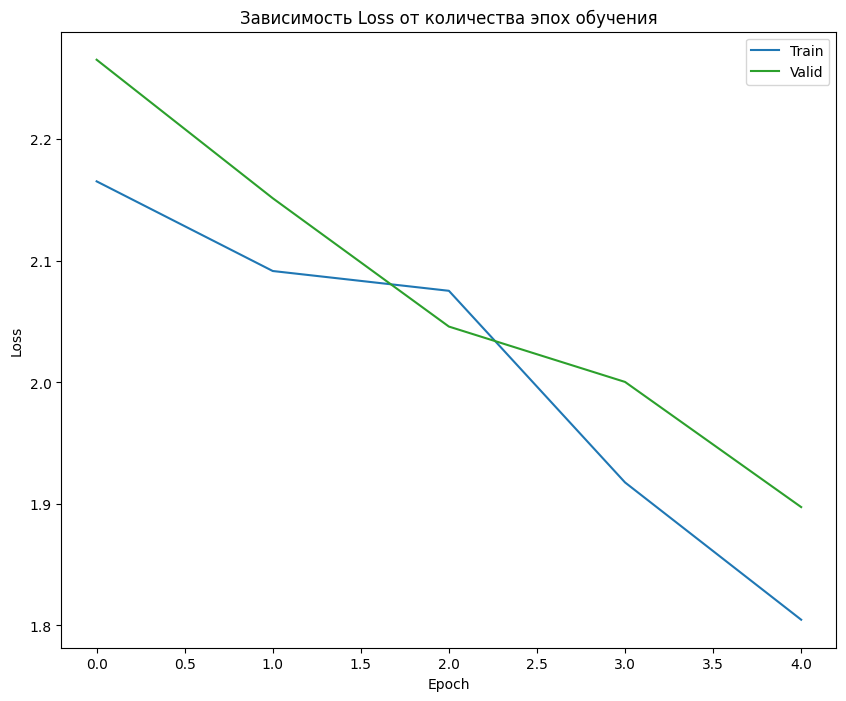

In [98]:
import matplotlib.pyplot as plt

def drow(train_losses, val_losses):
    plt.rcParams['figure.figsize'] = (10, 8)
    plt.plot(np.array(range(EPOCHS)), train_losses,  label='Train')
    plt.plot(np.array(range(EPOCHS)), val_losses, 'tab:green',  label='Valid')
    
    plt.title("Зависимость Loss от количества эпох обучения")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    
    plt.legend()

    plt.show()

drow(train_losses, val_losses)

In [99]:
evaluate(model, test_topics_dataloader, test_swda_dataloader,
                    test_midas_dataloader, test_emotion_dataloader,
                    test_sentiment_dataloader, test_toxic_dataloader,
                    test_factoid_dataloader)

100%|██████████| 175/175 [00:15<00:00, 11.49it/s]

Test Accuracy:  1.177 | Test F1:  0.603
Test Accuracy (topic):  2.320 | Test F1 (topic):  1.200
Test Accuracy (swda):  0.000 | Test F1 (swda):  0.000
Test Accuracy (midas):  0.080 | Test F1 (midas):  0.040
Test Accuracy (emotion):  2.160 | Test F1 (emotion):  1.080
Test Accuracy (sentiment):  0.560 | Test F1 (sentiment):  0.220
Test Accuracy (toxic):  1.680 | Test F1 (toxic):  0.840
Test Accuracy (factoid):  1.440 | Test F1 (factoid):  0.840
